## Summary Stats

### Summary Statistics by Sector
\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 0.25 & 0.5 & 0.75 & max \\
sector &  &  &  &  &  &  &  &  \\
\midrule
Basic Materials & 14304 & -0.00383 & 0.04637 & -2.28340 & -0.00356 & -0.00073 & 0.00156 & 0.42903 \\
Consumer Goods & 27285 & -0.00326 & 0.04440 & -3.19533 & -0.00348 & -0.00051 & 0.00147 & 1.33866 \\
Consumer Services & 36391 & -0.00649 & 0.18363 & -33.02045 & -0.00530 & -0.00095 & 0.00190 & 2.76780 \\
Energy & 19822 & -0.00287 & 0.04733 & -4.20222 & -0.00330 & -0.00053 & 0.00191 & 0.62895 \\
Financials & 49071 & -0.00454 & 0.25424 & -54.89420 & -0.00252 & -0.00057 & 0.00129 & 0.98506 \\
Government & 9465 & -0.00088 & 0.01091 & -0.16883 & -0.00168 & -0.00037 & 0.00061 & 0.15778 \\
Healthcare & 16219 & -0.00119 & 0.01535 & -0.40044 & -0.00202 & -0.00050 & 0.00075 & 0.48762 \\
Industrials & 31473 & -0.00280 & 0.03657 & -1.78786 & -0.00330 & -0.00063 & 0.00123 & 0.55938 \\
Technology & 13548 & -0.00165 & 0.02555 & -0.82665 & -0.00292 & -0.00066 & 0.00118 & 0.53674 \\
Telecommunications Services & 9349 & -0.00356 & 0.04225 & -1.68186 & -0.00358 & -0.00070 & 0.00131 & 0.56434 \\
Utilities & 21582 & -0.00307 & 0.06416 & -5.89227 & -0.00215 & -0.00051 & 0.00087 & 3.14688 \\
\bottomrule
\end{tabular}


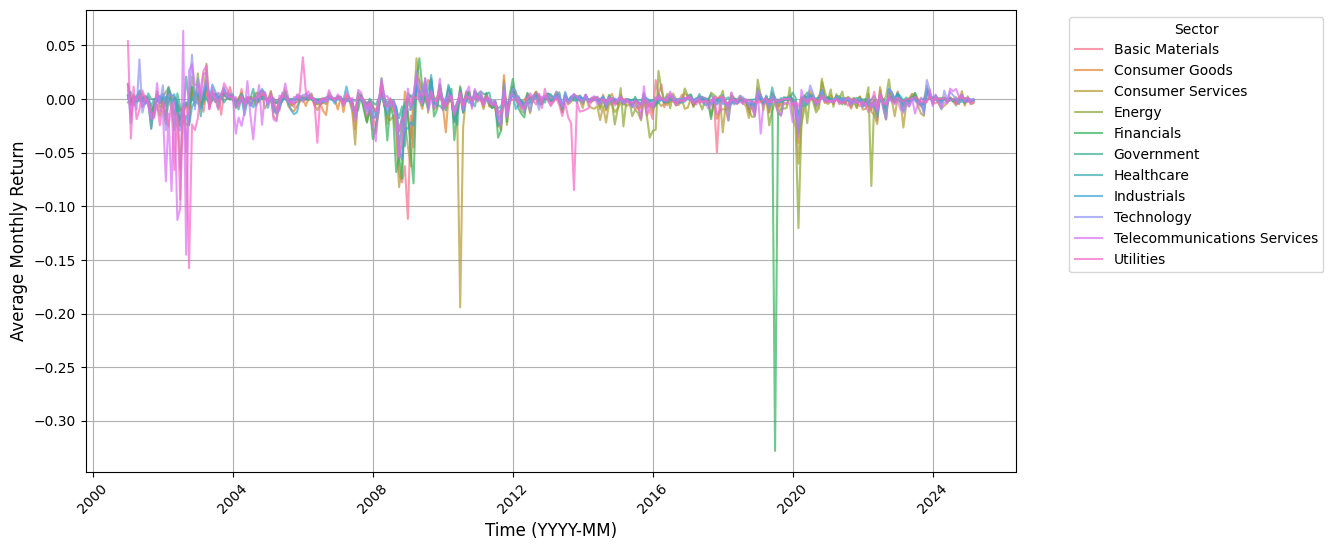

Saved plot to: /Users/saniazeb/Documents/credit-default-swap-returns-replication/_output/monthly_returns_over_time.png


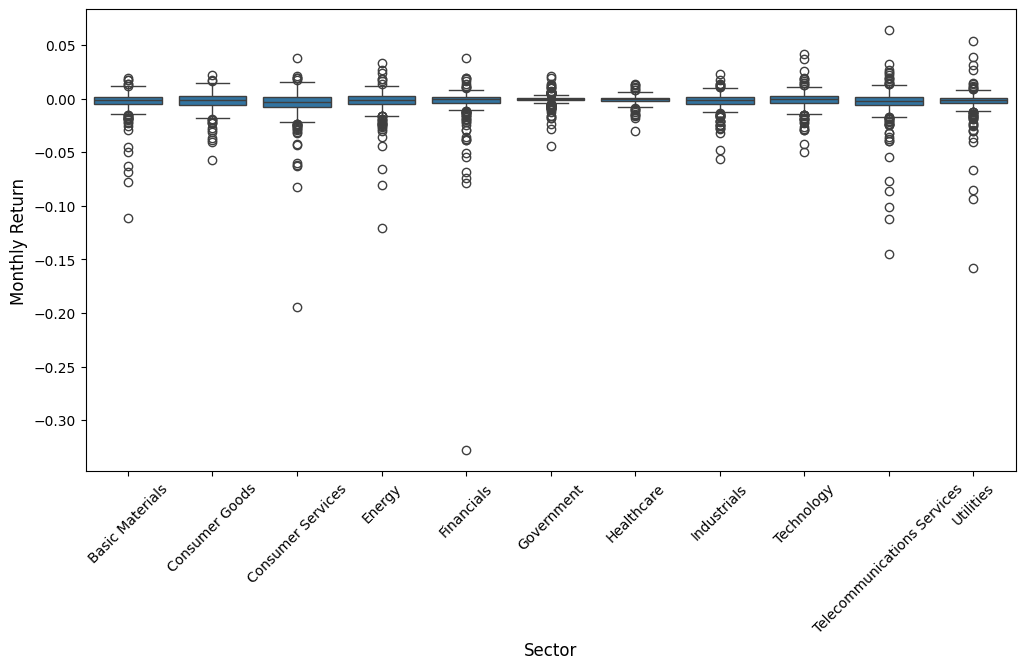

Saved plot to: /Users/saniazeb/Documents/credit-default-swap-returns-replication/_output/boxplot_cds_returns_by_sector.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from misc_tools import month_code_to_date
from pull_cds_return_data import *
from settings import config
from pathlib import Path
from create_portfolio import *
from pull_markit import *

import datetime

# Define paths
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))

# Set pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sets format for printing to LaTeX
float_format_func = lambda x: '{:.5f}'.format(x)

# Step 1: Load data
cds_return = load_cds_return()
sector = load_sector_data()

# Step 2: Merge data
cds_return = cds_return.merge(sector, on='ticker', how='left')

# Step 3: Calculate monthly return
monthly_return = calc_cds_monthly_return(create_yyyymm_col(cds_return))
monthly_return = monthly_return.merge(sector, on='ticker', how='left')

# Step 4: Summary statistics by sector
sector_describe = monthly_return.groupby("sector")["daily_return"].describe()
sector_describe["count"] = sector_describe["count"].astype(int)
sector_describe = sector_describe.rename(columns={"25%": "0.25", "50%": "0.5", "75%": "0.75"})

# Render LaTeX table in notebook output
latex_table_string = sector_describe.to_latex(float_format=float_format_func)
from IPython.display import display, Markdown
display(Markdown(f"### Summary Statistics by Sector\n{latex_table_string}"))

# Optionally, save LaTeX table to file
path = OUTPUT_DIR / f'latex_cds_by_sector_stats.tex'
with open(path, "w") as text_file:
    text_file.write(latex_table_string)

# Step 5: Plot monthly returns over time
monthly_return["yyyymm"] = monthly_return["yyyymm"].apply(month_code_to_date)
monthly_grouped = monthly_return.groupby(["sector", "yyyymm"])["daily_return"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_grouped, x="yyyymm", y="daily_return", hue="sector", alpha=0.7)

plt.xlabel("Time (YYYY-MM)", fontsize=12)
plt.ylabel("Average Monthly Return", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Move legend outside the plot for better visibility
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot inline in Jupyter
plt.show()

# Save the plot as PNG
output_plot_path = OUTPUT_DIR / "monthly_returns_over_time.png"
plt.savefig(output_plot_path, dpi=300, bbox_inches="tight")
plt.close()

print(f"Saved plot to: {output_plot_path}")

# Step 6: Boxplot of returns by sector
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_grouped, x="sector", y="daily_return")

plt.xlabel("Sector", fontsize=12)
plt.ylabel("Monthly Return", fontsize=12)
plt.xticks(rotation=45)

# Display the boxplot inline
plt.show()

# Save the boxplot
boxplot_path = OUTPUT_DIR / "boxplot_cds_returns_by_sector.png"
plt.savefig(boxplot_path, dpi=300, bbox_inches="tight")
plt.close()

print(f"Saved plot to: {boxplot_path}")


In [3]:
%run summary_stats.py


\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 0.25 & 0.5 & 0.75 & max \\
sector &  &  &  &  &  &  &  &  \\
\midrule
Basic Materials & 14304 & -0.00383 & 0.04637 & -2.28340 & -0.00356 & -0.00073 & 0.00156 & 0.42903 \\
Consumer Goods & 27285 & -0.00326 & 0.04440 & -3.19533 & -0.00348 & -0.00051 & 0.00147 & 1.33866 \\
Consumer Services & 36391 & -0.00649 & 0.18363 & -33.02045 & -0.00530 & -0.00095 & 0.00190 & 2.76780 \\
Energy & 19822 & -0.00287 & 0.04733 & -4.20222 & -0.00330 & -0.00053 & 0.00191 & 0.62895 \\
Financials & 49071 & -0.00454 & 0.25424 & -54.89420 & -0.00252 & -0.00057 & 0.00129 & 0.98506 \\
Government & 9465 & -0.00088 & 0.01091 & -0.16883 & -0.00168 & -0.00037 & 0.00061 & 0.15778 \\
Healthcare & 16219 & -0.00119 & 0.01535 & -0.40044 & -0.00202 & -0.00050 & 0.00075 & 0.48762 \\
Industrials & 31473 & -0.00280 & 0.03657 & -1.78786 & -0.00330 & -0.00063 & 0.00123 & 0.55938 \\
Technology & 13548 & -0.00165 & 0.02555 & -0.82665 & -0.00292 & -0.00066 & 0.00118

In [2]:
# Import the summary_stats.py script
import summary_stats

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 0.25 & 0.5 & 0.75 & max \\
sector &  &  &  &  &  &  &  &  \\
\midrule
Basic Materials & 14304 & -0.00383 & 0.04637 & -2.28340 & -0.00356 & -0.00073 & 0.00156 & 0.42903 \\
Consumer Goods & 27285 & -0.00326 & 0.04440 & -3.19533 & -0.00348 & -0.00051 & 0.00147 & 1.33866 \\
Consumer Services & 36391 & -0.00649 & 0.18363 & -33.02045 & -0.00530 & -0.00095 & 0.00190 & 2.76780 \\
Energy & 19822 & -0.00287 & 0.04733 & -4.20222 & -0.00330 & -0.00053 & 0.00191 & 0.62895 \\
Financials & 49071 & -0.00454 & 0.25424 & -54.89420 & -0.00252 & -0.00057 & 0.00129 & 0.98506 \\
Government & 9465 & -0.00088 & 0.01091 & -0.16883 & -0.00168 & -0.00037 & 0.00061 & 0.15778 \\
Healthcare & 16219 & -0.00119 & 0.01535 & -0.40044 & -0.00202 & -0.00050 & 0.00075 & 0.48762 \\
Industrials & 31473 & -0.00280 & 0.03657 & -1.78786 & -0.00330 & -0.00063 & 0.00123 & 0.55938 \\
Technology & 13548 & -0.00165 & 0.02555 & -0.82665 & -0.00292 & -0.00066 & 0.00118